Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict


Dataset Setup

In [3]:
# Set parameters
img_height, img_width = 256, 256
batch_size = 32


In [4]:
# Set dataset path
dataset_path = "/kaggle/input/tomato-dataset-v2/augmented_dataset"

# print the classes
classes = os.listdir(dataset_path)
print("Classes found:", classes)


Classes found: ['Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus']


Count Images per Class

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


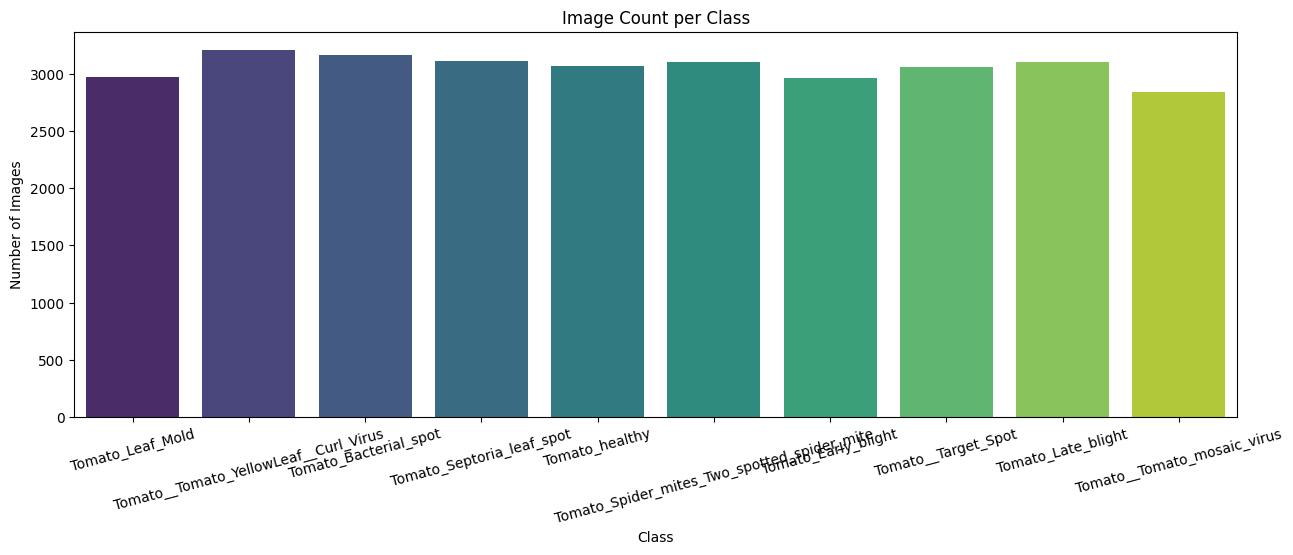

In [5]:
image_count = {}
for cls in classes:
    image_dir = os.path.join(dataset_path, cls)
    image_count[cls] = len(os.listdir(image_dir))

# Visualize image count per class
plt.figure(figsize=(15, 5))
sns.barplot(x=list(image_count.keys()), y=list(image_count.values()), palette="viridis")
plt.title("Image Count per Class")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.xticks(rotation=15)
plt.show()


Visualize Sample Images per Class

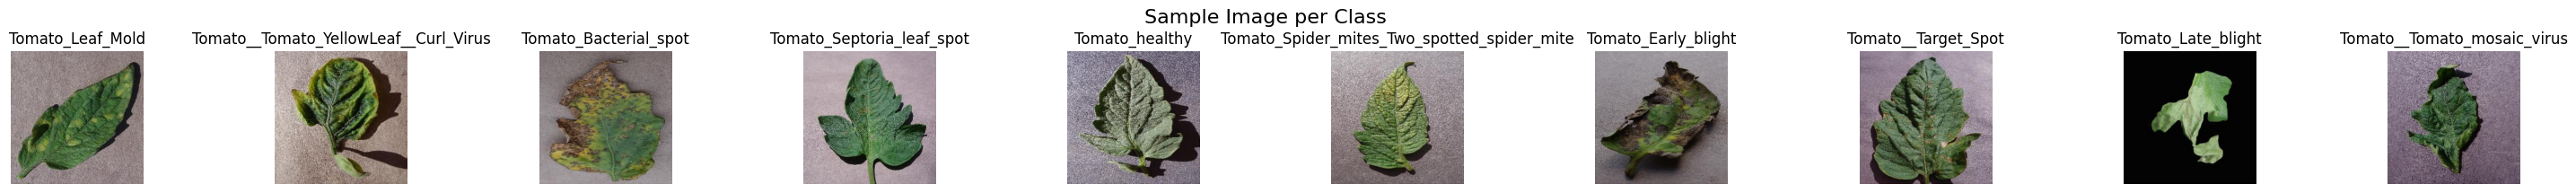

In [6]:
fig, axes = plt.subplots(1, len(classes), figsize=(30,2))
for idx, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    sample_img = os.listdir(cls_path)[0]
    img = Image.open(os.path.join(cls_path, sample_img))
    axes[idx].imshow(img)
    axes[idx].set_title(cls)
    axes[idx].axis("off")
plt.tight_layout()
plt.suptitle("Sample Image per Class", fontsize=16, y=1.05)
plt.show()


 Image Dimension & Aspect Ratio Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


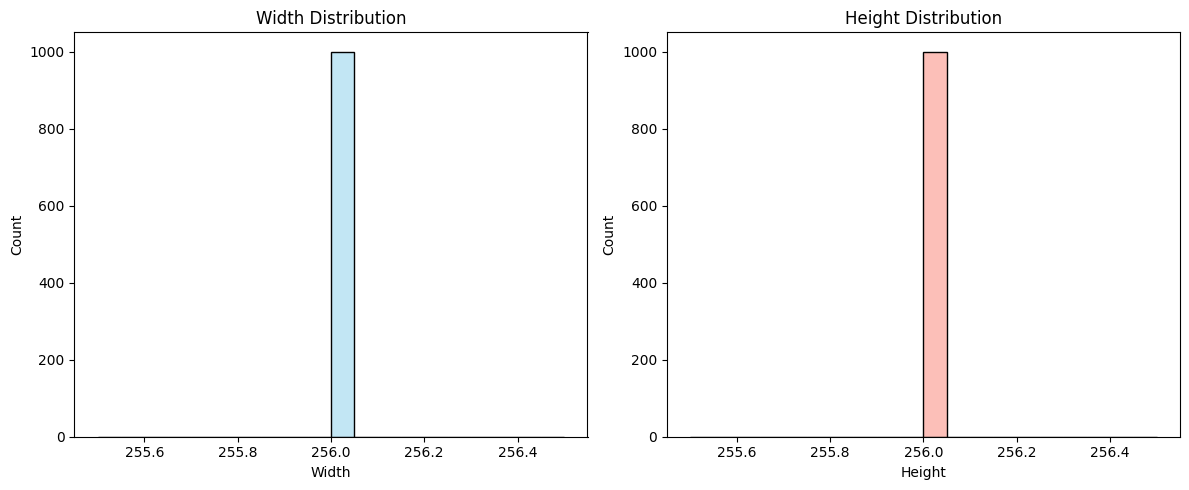

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


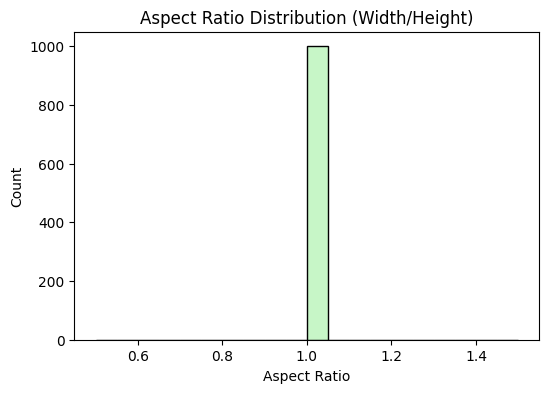

In [7]:
dimensions = []
aspect_ratios = []
for cls in classes:
    for file in os.listdir(os.path.join(dataset_path, cls))[:100]:  # Limit for speed
        path = os.path.join(dataset_path, cls, file)
        with Image.open(path) as img:
            width, height = img.size
            dimensions.append((width, height))
            aspect_ratios.append(width / height)

# Convert to DataFrame
dim_df = pd.DataFrame(dimensions, columns=['Width', 'Height'])

# Plot distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dim_df['Width'], kde=True, bins=20, color='skyblue')
plt.title("Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(dim_df['Height'], kde=True, bins=20, color='salmon')
plt.title("Height Distribution")
plt.tight_layout()
plt.show()

# Aspect Ratio
plt.figure(figsize=(6, 4))
sns.histplot(aspect_ratios, bins=20, kde=True, color='lightgreen')
plt.title("Aspect Ratio Distribution (Width/Height)")
plt.xlabel("Aspect Ratio")
plt.show()


RGB Pixel Distribution of One Image Per Class

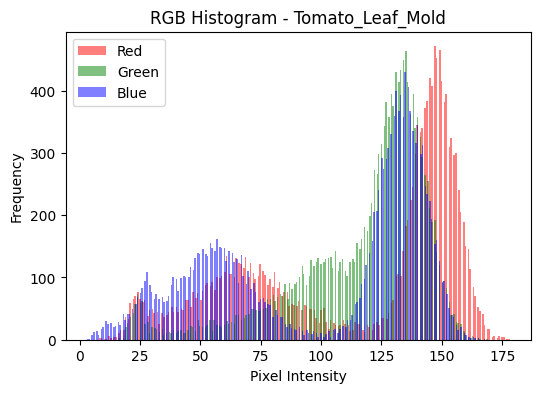

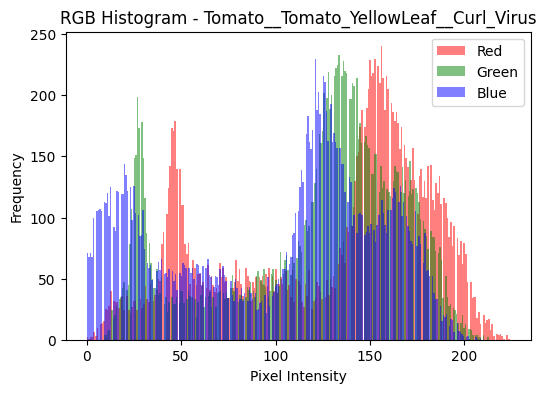

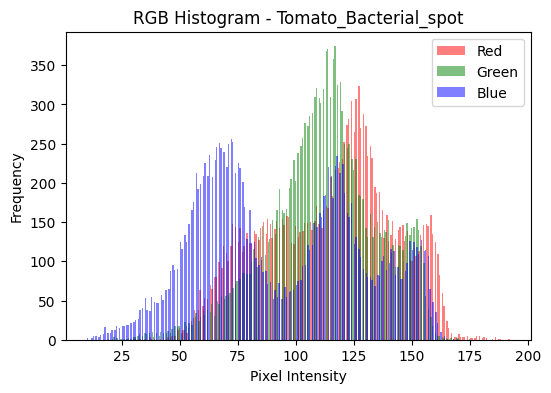

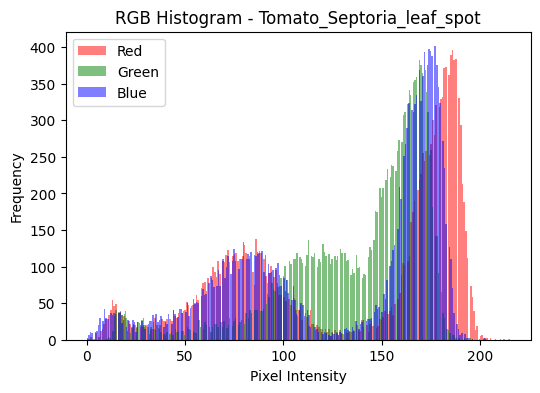

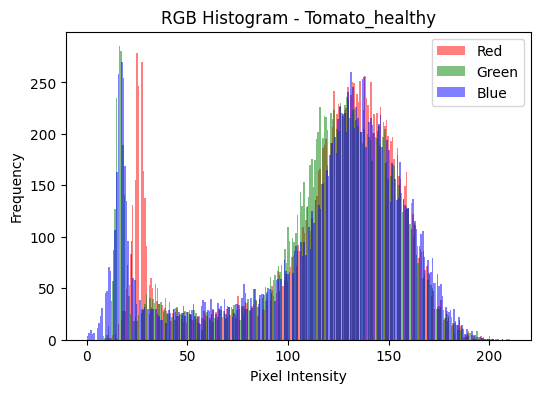

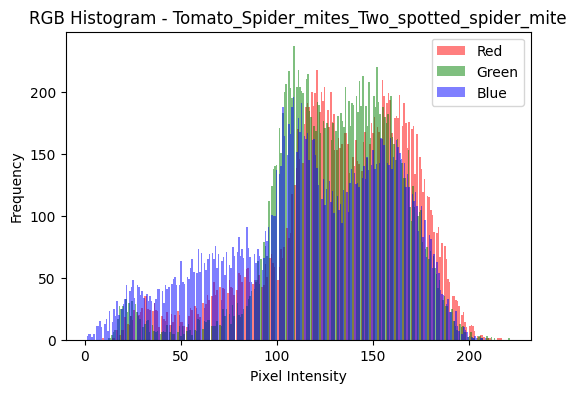

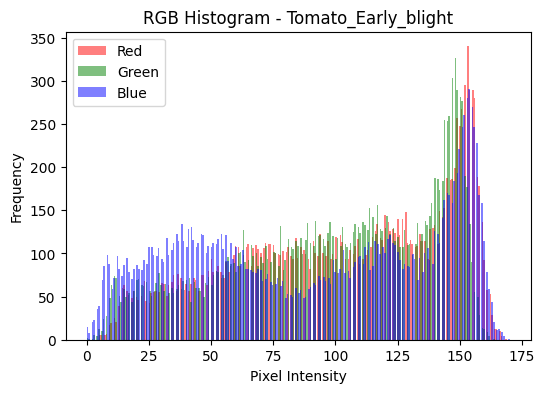

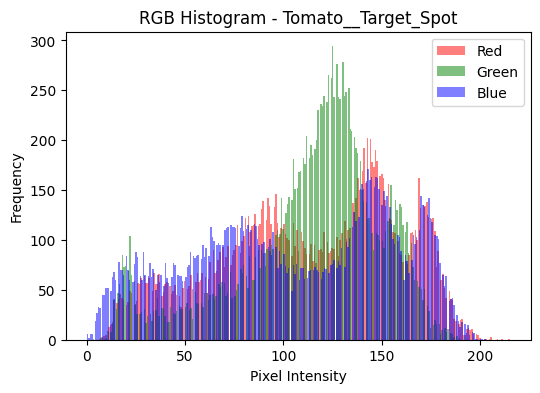

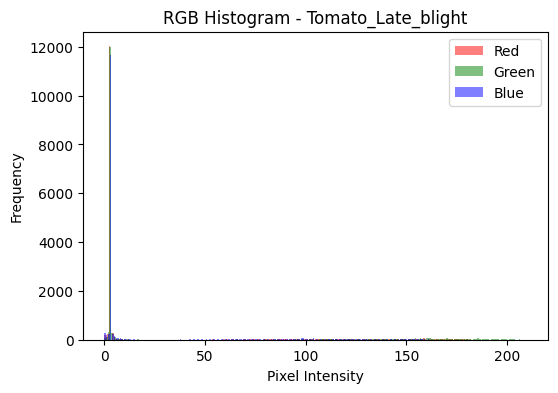

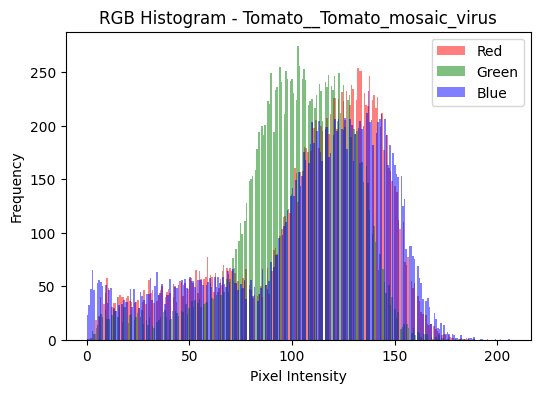

In [8]:
def plot_rgb_histogram(image_path, title):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    r, g, b = img.split()

    plt.figure(figsize=(6, 4))
    plt.hist(np.array(r).flatten(), bins=256, color='r', alpha=0.5, label='Red')
    plt.hist(np.array(g).flatten(), bins=256, color='g', alpha=0.5, label='Green')
    plt.hist(np.array(b).flatten(), bins=256, color='b', alpha=0.5, label='Blue')
    plt.title(f'RGB Histogram - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

for cls in classes:
    path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
    plot_rgb_histogram(path, cls)


Class Balance Check

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


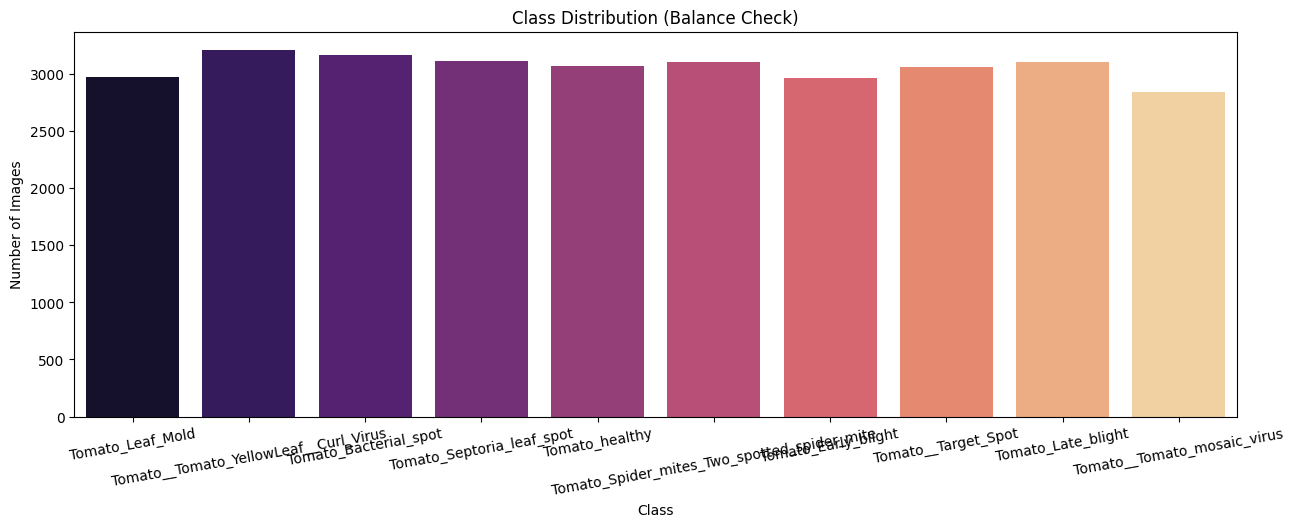

Tomato_Leaf_Mold: 2975 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
Tomato_Bacterial_spot: 3164 images
Tomato_Septoria_leaf_spot: 3112 images
Tomato_healthy: 3072 images
Tomato_Spider_mites_Two_spotted_spider_mite: 3104 images
Tomato_Early_blight: 2963 images
Tomato__Target_Spot: 3064 images
Tomato_Late_blight: 3106 images
Tomato__Tomato_mosaic_virus: 2841 images


In [9]:
# Visualizing class balance again
plt.figure(figsize=(15, 5))
sns.barplot(x=list(image_count.keys()), y=list(image_count.values()), palette="magma")
plt.title("Class Distribution (Balance Check)")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.xticks(rotation=10)
plt.show()

# Summary stats
for cls, count in image_count.items():
    print(f"{cls}: {count} images")


In [10]:
dataset_path

'/kaggle/input/tomato-dataset-v2/augmented_dataset'

In [11]:

image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

print(f"Total images found: {len(image_paths)}")


Total images found: 30609


In [12]:
!pip install split-folders

In [15]:
import splitfolders

# Input from read-only Kaggle input directory
input_folder = "/kaggle/input/tomato-dataset-v2/augmented_dataset"

# Output to a writable directory (working directory)
output_folder = "/kaggle/working/tomato_data_split"

# Perform the split: 70% train, 15% val, 15% test
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .15, .15), group_prefix=None)


Copying files: 30610 files [01:57, 261.15 files/s]


Data Visualization / EDA (Class Distribution)

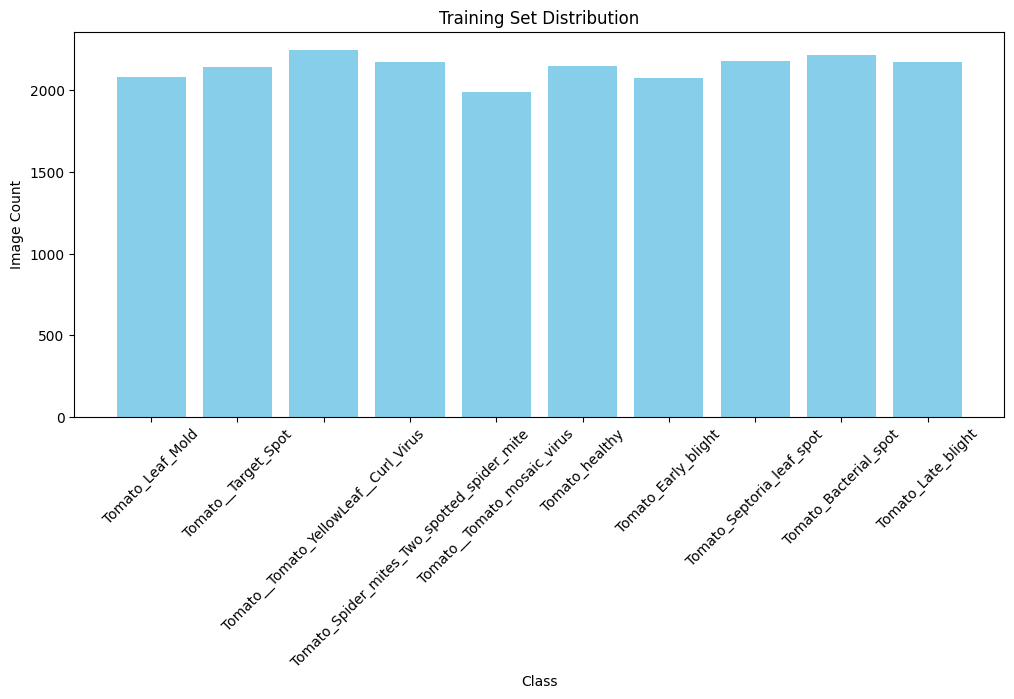

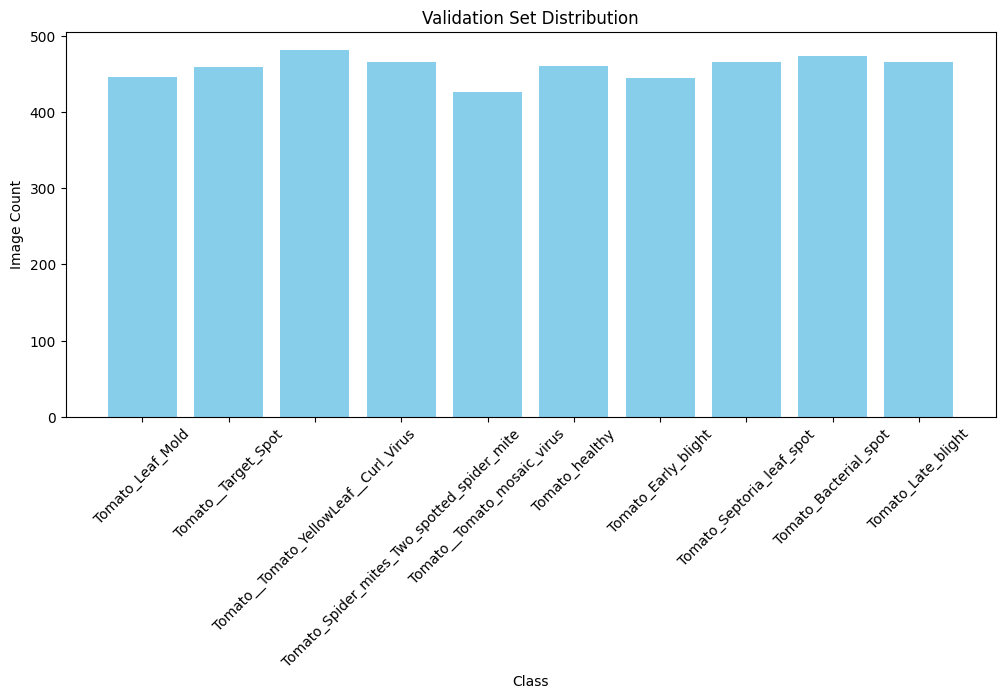

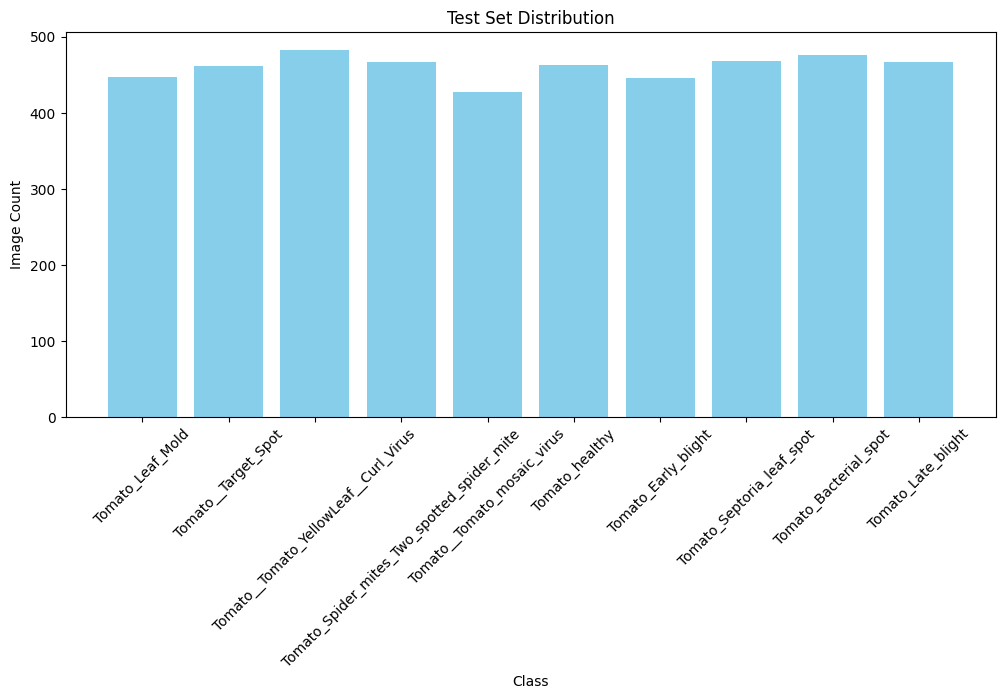

In [16]:
import os
import matplotlib.pyplot as plt

base_dir = "/kaggle/working/tomato_data_split"

def plot_distribution(folder_path, title):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))

    plt.figure(figsize=(12, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Image Count")
    plt.show()

# Plot distributions
plot_distribution(os.path.join(base_dir, "train"), "Training Set Distribution")
plot_distribution(os.path.join(base_dir, "val"), "Validation Set Distribution")
plot_distribution(os.path.join(base_dir, "test"), "Test Set Distribution")


ImageDataGenerators Setup

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (256, 256)
batch_size = 32

train_path = f"{base_dir}/train"
val_path = f"{base_dir}/val"
test_path = f"{base_dir}/test"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator   = val_datagen.flow_from_directory(val_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator  = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


2025-06-05 18:12:30.207085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749147150.445181      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749147150.512397      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 21421 images belonging to 10 classes.
Found 4586 images belonging to 10 classes.
Found 4602 images belonging to 10 classes.


Build a CNN Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749147164.856834      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749147164.857560      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Compile the Model

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Add Callbacks

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tqdm.keras import TqdmCallback

# Define callbacks
callbacks = [
    ModelCheckpoint("/kaggle/working/best_model.h5", save_best_only=True, monitor="val_accuracy", verbose=1),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.3, verbose=1),
    TqdmCallback(verbose=1)  # This adds the progress bar to training
]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Train the Model

In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1749147182.812586     126 service.cc:148] XLA service 0x7f5544005150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749147182.813765     126 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749147182.813790     126 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749147183.141729     126 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/670 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.1181 - loss: 3.1203

I0000 00:00:1749147188.790544     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


670/670 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3396 - loss: 1.8484
Epoch 1: val_accuracy improved from -inf to 0.73245, saving model to /kaggle/working/best_model.h5
670/670 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.3398 - loss: 1.8478 - val_accuracy: 0.7324 - val_loss: 0.7300 - learning_rate: 0.0010
Epoch 2/50
670/670 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6784 - loss: 0.9214
Epoch 2: val_accuracy improved from 0.73245 to 0.81923, saving model to /kaggle/working/best_model.h5
670/670 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.6784 - loss: 0.9213 - val_accuracy: 0.8192 - val_loss: 0.5364 - learning_rate: 0.0010
Epoch 3/50
670/670 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7561 - loss: 0.6872
Epoch 3: val_accuracy improved from 0.81923 to 0.87462, saving model to /kaggle/working/best_model.h5
670/670 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.7561 - loss: 0.6872 - val_accuracy: 0.8746 - val_loss: 0.3604 - learning_rate: 0.0010
Epoch 4/50
670/670

Evaluate the Model

In [22]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")


144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9228 - loss: 0.3326
Test Accuracy: 0.9348


 Plot Accuracy and Loss Curves

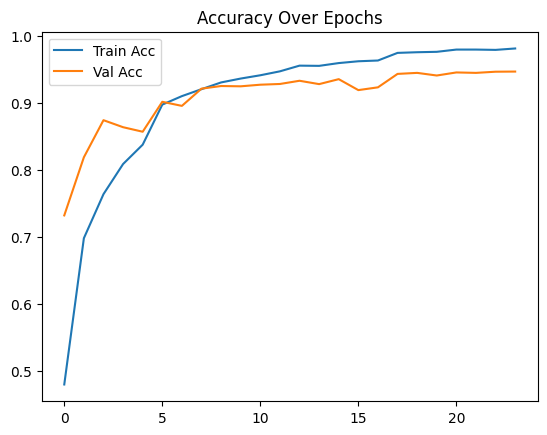

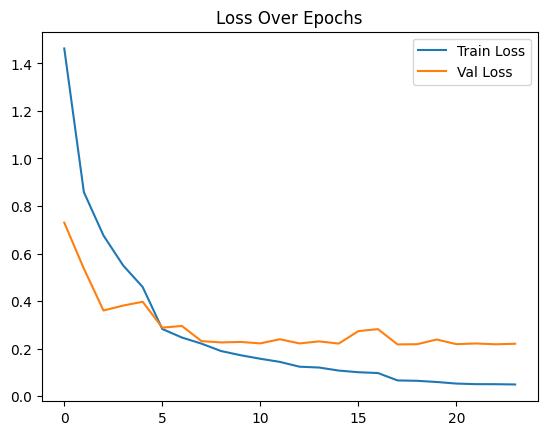

In [23]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


Save Class Labels for Reference

In [24]:
import json

# Save class labels to a JSON
class_indices = train_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}
with open('/kaggle/working/class_indices.json', 'w') as f:
    json.dump(inv_class_indices, f)


144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step
Accuracy: 0.940677966101695
Precision: 0.9411095506732021
Recall: 0.9407423762942082
F1 Score: 0.9407622061557864

Classification Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.96      0.96      0.96       476
                        Tomato_Early_blight       0.88      0.88      0.88       445
                         Tomato_Late_blight       0.93      0.91      0.92       467
                           Tomato_Leaf_Mold       0.96      0.96      0.96       447
                  Tomato_Septoria_leaf_spot       0.93      0.90      0.91       468
Tomato_Spider_mites_Two_spotted_spider_mite       0.94      0.92      0.93       467
                        Tomato__Target_Spot       0.86      0.93      0.90       461
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.98      0.98      0.98       482
                Tomato__Tomato_mosaic_virus       0.97

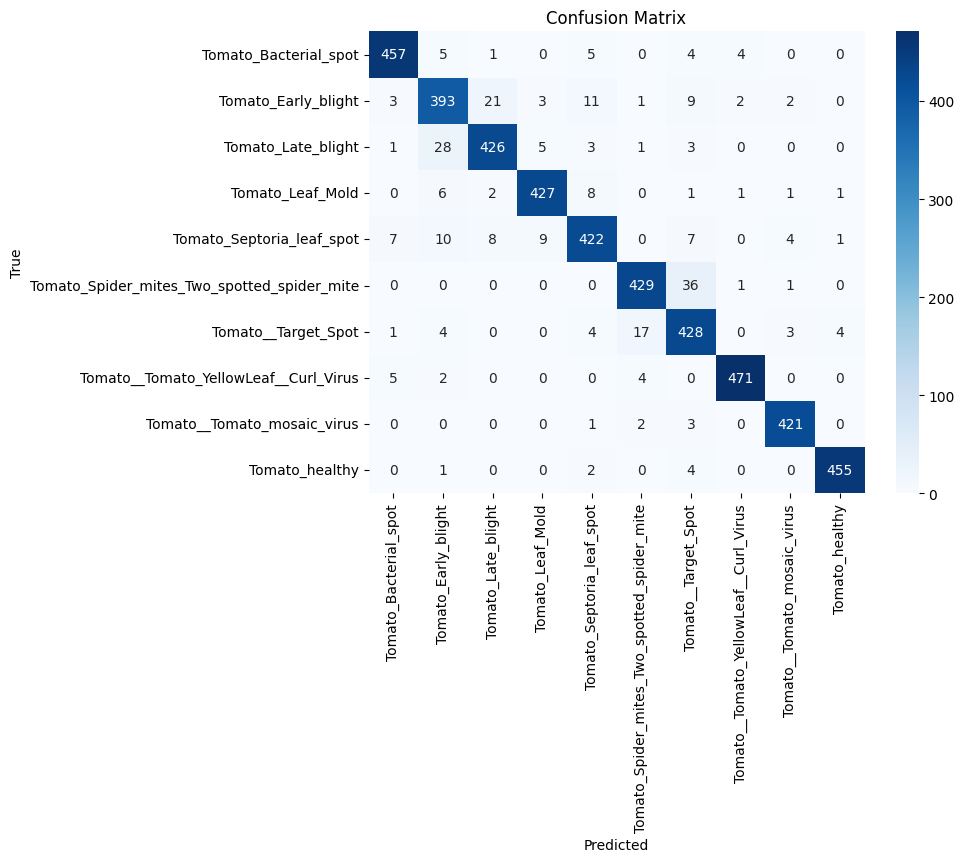

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels (these are already in order because shuffle=False)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1-score (Macro)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
